In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
dataset=pd.read_csv("/kaggle/input/insurance/insurance.csv",header=0)
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

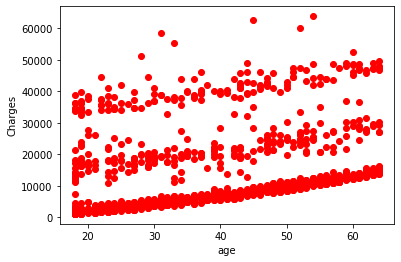

In [4]:
#checking do age and charges have any linear relation
import matplotlib.pyplot as plt
plt.scatter(X[:,0:1], y, color = 'red')
plt.xlabel('age')
plt.ylabel('Charges')
plt.show()

In [5]:
dataset[["sex","charges"]].groupby(["sex"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,sex,charges
1,male,13956.751178
0,female,12569.578844


We see that men pay more than women.

In [6]:
dataset[["children","charges"]].groupby(["children"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


In [7]:
dataset[["smoker","charges"]].groupby(["smoker"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


In [8]:
dataset[["region","charges"]].groupby(["region"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


In [9]:
region = dataset.groupby("region", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by region \n")
region

Average value of other properties by region 



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,region,age,bmi,children,charges
3,southwest,39.455385,30.596615,1.141538,12346.937377
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.196923,29.199785,1.147692,12417.575374
2,southeast,38.939560,33.355989,1.049451,14735.411438


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distplot')

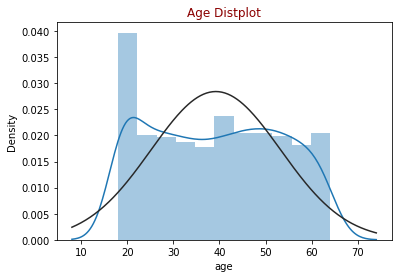

In [10]:
sns.distplot(dataset["age"], fit=norm)
plt.title("Age Distplot", color = "darkred")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'charges Distplot')

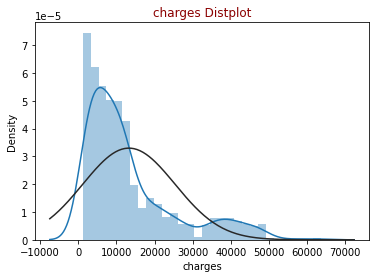

In [11]:
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")

skewness can be seen here. so we need to normalize this.

In [12]:
#Any missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#print(X[0:4,:])
ct = ColumnTransformer(transformers=[('encodersex', OneHotEncoder(), [1]),
                                     ('encoderchildren', OneHotEncoder(), [3]),
                                     ('encodersmoker', OneHotEncoder(), [4]),
                                     ('encoderregion', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X[0:4,:])

In [14]:
#To handle skweness of charges:
y = np.log1p(y)

In [15]:
#checking top 5 values
print(X[0:5])
print(y[0:5])

[[1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9]
 [0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77]
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 28 33.0]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 33 22.705]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 32 28.88]]
[9.73423565 7.45388181 8.40076319 9.99813709 8.26045542]


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Multiple Linear Regression model***

In [18]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
from sklearn import metrics
score_rf=metrics.r2_score(y_test, y_pred)
print(score_rf)

0.8272536630125062


***Random Forest Regression model***

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [20]:
print(rf_random.best_params_)
score_rf=metrics.r2_score(y_test, y_pred)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [21]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error -->', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r_square score -->  0.9090178252278438
Mean Absolute Error --> 0.16336299710318886
Mean Squared Error --> 0.07811459848575461
Root Mean Squared Error --> 0.2794898897737709


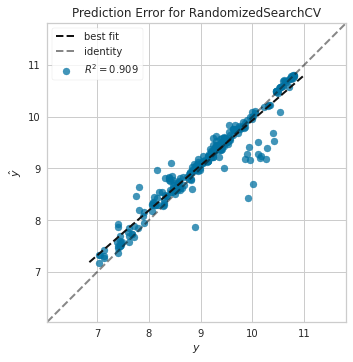

In [22]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf_random)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show();

In [23]:
# Predicting the Test set results
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

***SVM Regressor***

In [24]:
# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
metrics.r2_score(y_test, y_pred)

0.9173785485042603

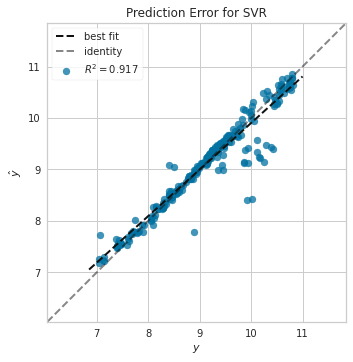

In [64]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(regressor)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show();

***KNeighborsRegressor***

In [35]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

# Evaluating the Model Performance
metrics.r2_score(y_test, y_pred)

0.8371182023334395

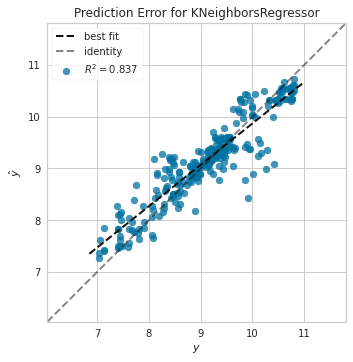

In [65]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(neigh)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show();

***GradientBoostingRegressor***

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(max_depth=3,random_state=20)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
metrics.r2_score(y_test, y_pred)

0.9158573790994363

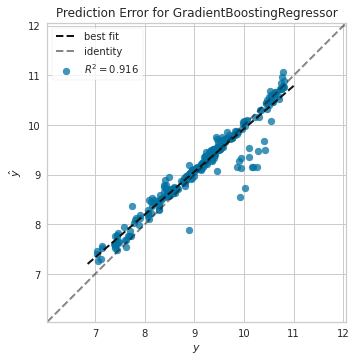

In [66]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(reg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show();